## Programming WF for ADCP DATA -- TRURO 2023
### © In_coast lab author: C. Hart, 2024-01-05

In [1]:
# Import necessary libraries
import easygui
import pandas as pd
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
sys.path.append(r'c:\users\s1495478\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

Index(['DateTime', 'Battery', 'Heading', 'Pitch', 'Roll', 'Pressure',
       'Temperature', 'AnalogIn1', 'AnalogIn2', 'Speed#1(0.30m)',
       'Dir#1(0.30m)', 'Speed#2(0.50m)', 'Dir#2(0.50m)', 'Speed#3(0.70m)',
       'Dir#3(0.70m)', 'Speed#4(0.90m)', 'Dir#4(0.90m)', 'Speed#5(1.10m)',
       'Dir#5(1.10m)', 'Speed#6(1.30m)', 'Dir#6(1.30m)', 'Speed#7(1.50m)',
       'Dir#7(1.50m)', 'Speed#8(1.70m)', 'Dir#8(1.70m)', 'Speed#9(1.90m)',
       'Dir#9(1.90m)', 'Speed#10(2.10m)', 'Dir#10(2.10m)', 'Speed#11(2.30m)',
       'Dir#11(2.30m)', 'Speed#12(2.50m)', 'Dir#12(2.50m)', 'Speed#13(2.70m)',
       'Dir#13(2.70m)', 'Speed#14(2.90m)', 'Dir#14(2.90m)', 'Speed#15(3.10m)',
       'Dir#15(3.10m)', 'Speed#16(3.30m)', 'Dir#16(3.30m)', 'Speed#17(3.50m)',
       'Dir#17(3.50m)', 'Speed#18(3.70m)', 'Dir#18(3.70m)', 'Speed#19(3.90m)',
       'Dir#19(3.90m)', 'Speed#20(4.10m)', 'Dir#20(4.10m)'],
      dtype='object')


<Axes: xlabel='DateTime'>

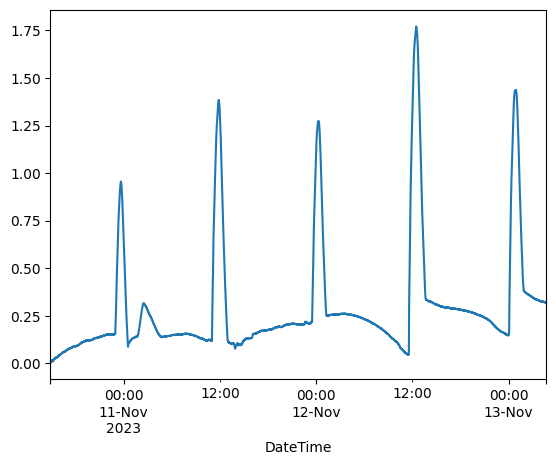

In [61]:
# read ADCP DATA and set index as DateTime
# file_path = r'C:\Users\S1495478\Documents\ADCP\TRURO_2023\Truro_nov23\TRU1MH03_2.csv'
file_path = r'C:\Users\S1495478\Documents\ADCP\TRURO_2023\Truro_nov23\tru2mh01_1_p.csv'
# file_path = r'C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301.csv'


# df = df.drop(df.index)
df = pd.read_csv(file_path, quotechar='"', delimiter=';', skipinitialspace=True)
print(df.columns)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index('DateTime')
df['Pressure'].plot()

C:\Users\S1495478\AppData\Local\Temp\ipykernel_17152\102927891.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pf['DateTime'] = pd.to_datetime(pf['Date'] + ' ' + pf['Time'])


Index(['Date', 'Time', 'Pressure'], dtype='object')


<Axes: xlabel='DateTime'>

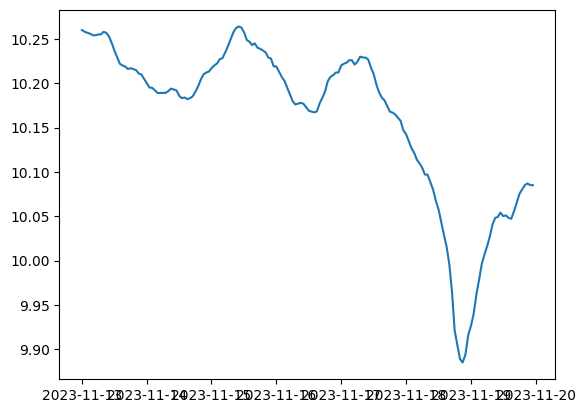

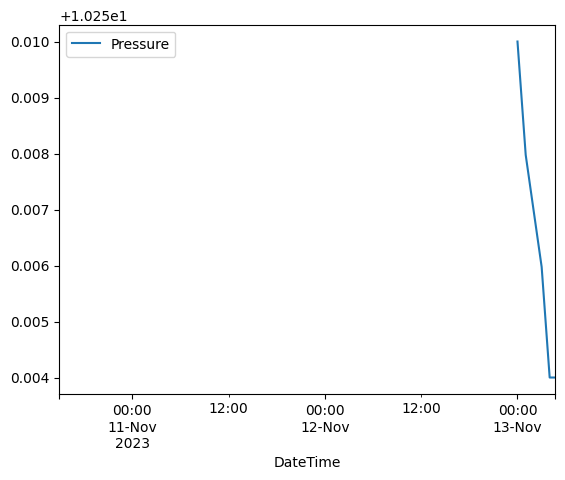

In [48]:
# read pressure data
csv_file_path = r'C:\Users\S1495478\Documents\Weather Underground\ONS_pres_20231113.txt'
pf = pd.read_csv(csv_file_path, delimiter='\t')
pf['DateTime'] = pd.to_datetime(pf['Date'] + ' ' + pf['Time'])
pf = pf.set_index('DateTime')
pf = pf.rename(columns={'pres (kPa)': 'Pressure'})
pf['Pressure'] = pf['Pressure'] / 10
pf = pf.resample('S').interpolate()
print(pf.columns)

# Interpolate pressure timeseries to fit the rsk
interpolated_pf = pf.reindex(df.index)
interpolated_pf['Pressure'] = interpolated_pf['Pressure'].interpolate(method='linear')

plt.plot(pf.index, pf['Pressure'])
interpolated_pf.plot()

# plt.plot(pf.index, pf['Pressure'])
# plt.plot(df.index, df['Pressure'])
# df['Pressure'].plot()
# plt.show()

# print(interpolated_pf['Pressure'])
# for i in range(len(interpolated_pf)):
#     print(interpolated_pf['Pressure'][i])

In [58]:
# Create a list with all the speed column names
speed_columns = []
dir_columns = []
initial = 0.1
it = 0.2

num=21

for i in range(1,num):
    speed_columns.append('Speed#' + str(i) + '(' + str(round(initial + it*(i),1)) + str(0) + 'm)')
print(speed_columns)
for i in range(1,num):
    dir_columns.append('Dir#' + str(i) + '(' + str(round(initial + it*(i),1)) + str(0) + 'm)')
print(dir_columns)

['Speed#1(0.30m)', 'Speed#2(0.50m)', 'Speed#3(0.70m)', 'Speed#4(0.90m)', 'Speed#5(1.10m)', 'Speed#6(1.30m)', 'Speed#7(1.50m)', 'Speed#8(1.70m)', 'Speed#9(1.90m)', 'Speed#10(2.10m)', 'Speed#11(2.30m)', 'Speed#12(2.50m)', 'Speed#13(2.70m)', 'Speed#14(2.90m)', 'Speed#15(3.10m)', 'Speed#16(3.30m)', 'Speed#17(3.50m)', 'Speed#18(3.70m)', 'Speed#19(3.90m)', 'Speed#20(4.10m)']
['Dir#1(0.30m)', 'Dir#2(0.50m)', 'Dir#3(0.70m)', 'Dir#4(0.90m)', 'Dir#5(1.10m)', 'Dir#6(1.30m)', 'Dir#7(1.50m)', 'Dir#8(1.70m)', 'Dir#9(1.90m)', 'Dir#10(2.10m)', 'Dir#11(2.30m)', 'Dir#12(2.50m)', 'Dir#13(2.70m)', 'Dir#14(2.90m)', 'Dir#15(3.10m)', 'Dir#16(3.30m)', 'Dir#17(3.50m)', 'Dir#18(3.70m)', 'Dir#19(3.90m)', 'Dir#20(4.10m)']


In [85]:
# Assuming df is your DataFrame
file_path = r"C:\Users\S1495478\Documents\ADCP\TRURO_2023\Truro_nov23\TRU1MH03_2.v2", r"C:\Users\S1495478\Documents\ADCP\TRURO_2023\Truro_nov23\TRU1MH03_2.v3", r"C:\Users\S1495478\Documents\ADCP\TRURO_2023\Truro_nov23\TRU1MH03_2.v1"
# file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"

# data_array = np.loadtxt(file_path[1])
# data = np.loadtxt(file_path[1])

# Depth column for colormap
depth_columns = []
depths = []

for col in speed_columns:
    depth = col[8:-2]
    if depth.startswith('('): depth = depth[1:]
    depths.append(float(depth))
    depth_column = 'Depth' + str(col[5:-7])
    depth_columns.append(depth_column)
    df[depth_column] = depth

# for i in range(0, len(speed_columns)):
#     col = []
#     for j in range(len(df[speed_columns[i]])):
#         col.append(df[speed_columns[i]][j])   
#     col_df = pd.DataFrame(col, columns=['col'], index=df.index)
#     new_column = pd.DataFrame({
#         'data_column': col_df['col'],  # Example: Sum of existing columns
#     })
#     df = pd.concat([df, new_column], axis=1)

for i in range(0, len(speed_columns)):
    new_column = pd.DataFrame({
        'dir_column': df[dir_columns[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, new_column], axis=1)
    
for i in range(0, len(speed_columns)):
    new_column = pd.DataFrame({
        'speed_column': df[speed_columns[i]],  # Example: Sum of existing columns
    })
    df = pd.concat([df, new_column], axis=1)

In [87]:
print(df.columns)

print(df['speed_column'].shape)
print(data)

Index(['Battery', 'Heading', 'Pitch', 'Roll', 'Pressure', 'Temperature',
       'AnalogIn1', 'AnalogIn2', 'Speed#1(0.30m)', 'Dir#1(0.30m)',
       ...
       'speed_column', 'speed_column', 'speed_column', 'speed_column',
       'speed_column', 'speed_column', 'speed_column', 'speed_column',
       'speed_column', 'speed_column'],
      dtype='object', length=128)
(14838, 20)
[[-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 ...
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]]


In [89]:
import numpy as np

# Specify the file path
# file_path = r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v1", r"C:\Users\S1495478\Documents\ADCP\MV_20231004\MV202301_p.v2"

# data_array = np.loadtxt(file_path[1])
direction = df['dir_column'].to_numpy()
speed = df['speed_column'].to_numpy()

speed = np.transpose(speed)
direction = np.transpose(direction)
# data_array = np.transpose(data_array)

# print(len(data_array[0]), len(speed_columns[0]), len(dir_columns[0]))
# print(len(data_array), len(speed_columns), len(dir_columns))

# # Set a threshold for excluding values
# threshold = -8
# mask = np.array(data_array) < -0.5

# # Create a masked array to exclude values below the threshold
# # masked_array = np.ma.masked_array(data_array, mask)
# # masked_array = np.ma.masked_array(dir_columns, mask)
# masked_array = np.ma.masked_array(speed_columns, mask)
# fig, ax1 = plt.subplots(figsize=(8, 4))

# # Print the resulting array
# # Assuming x and y axes correspond to indices
# x_axis = df.index
# y_axis = depths

# # Create a meshgrid from x and y axes
# X, Y = np.meshgrid(x_axis, y_axis)

# # Plot the filled contours
# plt.scatter(X, Y, s=550, c=masked_array[:][0:len(df.index)], edgecolor='none', marker='|')
# # plt.contourf(X, Y, masked_array[:][0:len(df.index)], cmap='viridis')

# num_ticks = 5

# date_num = mdates.date2num(x_axis) # Convert datetime objects to numerical values
# tick_positions = np.linspace(date_num.min(), date_num.max(), num=num_ticks) # Compute the tick positions
# tick_dates = mdates.num2date(tick_positions) # Convert numerical values back to datetime objects

# ax1.set_xticks(ticks=tick_dates)
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# ax1.tick_params(axis='both', which='major', labelsize=8)

# # Add color bar for reference
# plt.colorbar(label = 'speed (m/s)')

# # Label the axes
# plt.xlabel('time')
# plt.ylabel('depth (m)')

# # df['Pressure'].plot()

# # Set x-axis and y-axis limits
# # plt.xlim(x_axis[6800], x_axis[int(9000)])  # Adjust as needed
# plt.ylim(0.25, 5) #y_axis[4])  # Adjust as needed

# # Show the plot
# plt.show()

In [92]:
print(direction.shape, speed.shape)
print(direction)

(14838, 20) (14838, 20)
[[-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 ...
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]
 [-9. -9. -9. ... -9. -9. -9.]]
